In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error 


In [103]:
data = pd.read_excel('Query2_1401_03_01.xlsx')

data.head()

,ردیف,شرح فارسی,تعداد کل قطعه در ماه,کد سازنده,ماه,قیمت نهایی قطعه,قیمت حمل هر قطعه,lt- دقیقه,حجم کانبان
0,1,بست اتصال لوله هاي اگزوزموتور1900,25920,شرکت b,4,14411,110,1320,8960
1,2,بست اتصال لوله هاي اگزوزموتور1900,15200,شرکت b,5,14411,110,1320,8960
2,3,بست اتصال لوله هاي اگزوزموتور1900,26240,شرکت b,6,14411,110,1320,8960
3,4,بست اتصال لوله هاي اگزوزموتور1900,12480,شرکت b,7,14411,110,1320,8960
4,5,بست اتصال لوله هاي اگزوزموتور1900,14400,شرکت b,8,14411,110,1320,8960


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ردیف                  809 non-null    int64 
 1   شرح فارسی             809 non-null    object
 2   تعداد کل قطعه در ماه  809 non-null    int64 
 3   کد سازنده             809 non-null    object
 4   ماه                   809 non-null    int64 
 5   قیمت نهایی قطعه       809 non-null    int64 
 6   قیمت حمل هر قطعه      809 non-null    int64 
 7   lt- دقیقه             809 non-null    int64 
 8   حجم کانبان            809 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 57.0+ KB


In [105]:
data.describe()

,ردیف,تعداد کل قطعه در ماه,ماه,قیمت نهایی قطعه,قیمت حمل هر قطعه,lt- دقیقه,حجم کانبان
count,809.000000,809.000000,809.000000,8.090000e+02,809.000000,809.000000,809.000000
mean,405.000000,21029.405439,6.521632,1.269575e+06,9693.637824,1954.042027,6494.677379
std,233.682477,27011.614208,3.377977,7.239018e+06,41774.194995,1132.311053,9613.153577
min,1.000000,156.000000,1.000000,1.096000e+03,1.000000,100.000000,6.000000
25%,203.000000,6300.000000,4.000000,6.671000e+03,11.000000,1320.000000,1200.000000
50%,405.000000,11520.000000,6.000000,1.377300e+04,34.000000,2040.000000,3600.000000
75%,607.000000,24500.000000,9.000000,3.717200e+04,218.000000,2280.000000,7200.000000
max,809.000000,396000.000000,12.000000,6.107812e+07,284240.000000,4320.000000,68250.000000


In [106]:
data['ارزش'] = data['قیمت نهایی قطعه'] * data['تعداد کل قطعه در ماه']
data['درصد ارزش پولي'] = data['ارزش'] / data['ارزش'].sum()
data['درصد تقاضا'] = data['تعداد کل قطعه در ماه'] /  data['تعداد کل قطعه در ماه'].sum()



In [107]:

ABC = pd.DataFrame(data.groupby('شرح فارسی').aggregate({'ارزش': 'sum' , 'درصد ارزش پولي' : 'sum' , 'درصد تقاضا' : 'sum' }).sort_values(by = 'ارزش' , ascending = False))

ABC

,ارزش,درصد ارزش پولي,درصد تقاضا
شرح فارسی,,,
سپرعقب كامل,1623784188467,0.363012,0.010062
مجموعه داشبورد دو رنگ,900413586072,0.201296,0.000867
سپرجلوكامل,856058566468,0.191380,0.010458
بوسترترمز9اينچ باكاسه پدال كابل كلاچ اتوماتيك,341403488256,0.076324,0.005507
روكش پلاستيكي محفظه جاچراغي صندوق عقب,112562406000,0.025164,0.009413
...,...,...,...
بست شيلنگ اب قطر19-11ميليمتر,83068000,0.000019,0.000235
پيچ سركونيك باواشر-45*10ميليمتر,61360000,0.000014,0.000118
واشرتخت 2/5*24*12ميليمتر,34732800,0.000008,0.001129


In [108]:
ABC['درصد تجمعی'] = ABC['درصد ارزش پولي'].cumsum()

ABC = ABC.reset_index()

ABC

,شرح فارسی,ارزش,درصد ارزش پولي,درصد تقاضا,درصد تجمعی
0,سپرعقب كامل,1623784188467,0.363012,0.010062,0.363012
1,مجموعه داشبورد دو رنگ,900413586072,0.201296,0.000867,0.564308
2,سپرجلوكامل,856058566468,0.191380,0.010458,0.755688
3,بوسترترمز9اينچ باكاسه پدال كابل كلاچ اتوماتيك,341403488256,0.076324,0.005507,0.832012
4,روكش پلاستيكي محفظه جاچراغي صندوق عقب,112562406000,0.025164,0.009413,0.857177
...,...,...,...,...,...
90,بست شيلنگ اب قطر19-11ميليمتر,83068000,0.000019,0.000235,0.999970
91,پيچ سركونيك باواشر-45*10ميليمتر,61360000,0.000014,0.000118,0.999984
92,واشرتخت 2/5*24*12ميليمتر,34732800,0.000008,0.001129,0.999991
93,بست شيلنگ آاب بقطر 19 ميليمتر,31141000,0.000007,0.000647,0.999998


In [109]:
ABC['دسته کالا'] = pd.cut(ABC.index , bins = [-1 , 10 , 30 , 95], labels = ['A' , 'B' , 'C'])


In [110]:
ABC.head(5)

,شرح فارسی,ارزش,درصد ارزش پولي,درصد تقاضا,درصد تجمعی,دسته کالا
0,سپرعقب كامل,1623784188467,0.363012,0.010062,0.363012,A
1,مجموعه داشبورد دو رنگ,900413586072,0.201296,0.000867,0.564308,A
2,سپرجلوكامل,856058566468,0.191380,0.010458,0.755688,A
3,بوسترترمز9اينچ باكاسه پدال كابل كلاچ اتوماتيك,341403488256,0.076324,0.005507,0.832012,A
4,روكش پلاستيكي محفظه جاچراغي صندوق عقب,112562406000,0.025164,0.009413,0.857177,A


In [13]:
def color_changing(val):
    if val =='A':
        color = 'green'
    elif val == 'B':
        color = 'blue'
    else:
        color ='red'
    return 'background-color: %s' % color

ABC.style.applymap(color_changing , subset = 'دسته کالا')

,شرح فارسی,ارزش,درصد ارزش پولي,درصد تقاضا,درصد تجمعی,دسته کالا
0,سپرعقب كامل,1623784188467,0.363012,0.010062,0.363012,A
1,مجموعه داشبورد دو رنگ,900413586072,0.201296,0.000867,0.564308,A
2,سپرجلوكامل,856058566468,0.191380,0.010458,0.755688,A
3,بوسترترمز9اينچ باكاسه پدال كابل كلاچ اتوماتيك,341403488256,0.076324,0.005507,0.832012,A
4,روكش پلاستيكي محفظه جاچراغي صندوق عقب,112562406000,0.025164,0.009413,0.857177,A
5,قاب روكش اينه درجلوچپ,106550588592,0.023820,0.033430,0.880997,A
6,قاب پلاستيكي پشت زيرارنجي صندلي عقب,61474740480,0.013743,0.010778,0.894740,A
7,مجموعه ترمزضد قفل با پايه 405 BWI,55216804500,0.012344,0.000187,0.907085,A
8,دستگيره در بازكن بيروني چپ,49804540856,0.011134,0.032765,0.918219,A
9,دستگيره در بازكن بيروني راست,49463856932,0.011058,0.032541,0.929277,A


In [ ]:
ABC.to_excel('abc_analysis.xlsx')

# regression

In [5]:
data[data['کد سازنده'] == 'شرکت b']

,ردیف,شرح فارسی,تعداد کل قطعه در ماه,کد سازنده,ماه,قیمت نهایی قطعه,قیمت حمل هر قطعه,lt- دقیقه,حجم کانبان
0,1,بست اتصال لوله هاي اگزوزموتور1900,25920,شرکت b,4,14411,110,1320,8960
1,2,بست اتصال لوله هاي اگزوزموتور1900,15200,شرکت b,5,14411,110,1320,8960
2,3,بست اتصال لوله هاي اگزوزموتور1900,26240,شرکت b,6,14411,110,1320,8960
3,4,بست اتصال لوله هاي اگزوزموتور1900,12480,شرکت b,7,14411,110,1320,8960
4,5,بست اتصال لوله هاي اگزوزموتور1900,14400,شرکت b,8,14411,110,1320,8960
...,...,...,...,...,...,...,...,...,...
743,744,بست نگهدارنده شيلنگ روغن پمپ هيدروليك فرمان,2400,شرکت b,8,12802,73,1320,1200
744,745,بست نگهدارنده شيلنگ روغن پمپ هيدروليك فرمان,3600,شرکت b,9,12802,73,1320,1200
745,746,بست نگهدارنده شيلنگ روغن پمپ هيدروليك فرمان,4800,شرکت b,10,12802,73,1320,1200
746,747,بست نگهدارنده شيلنگ روغن پمپ هيدروليك فرمان,4800,شرکت b,11,12802,73,1320,1200


In [111]:
x = 'روكش پلاستيكي محفظه جاچراغي صندوق عقب'
dashbord = data[data['شرح فارسی']== x]



In [112]:
dashbord

,ردیف,شرح فارسی,تعداد کل قطعه در ماه,کد سازنده,ماه,قیمت نهایی قطعه,قیمت حمل هر قطعه,lt- دقیقه,حجم کانبان,ارزش,درصد ارزش پولي,درصد تقاضا
323,324,روكش پلاستيكي محفظه جاچراغي صندوق عقب,10080,شرکت d,1,702900,13159,600,60,7085232000,0.001584,0.000592
324,325,روكش پلاستيكي محفظه جاچراغي صندوق عقب,11100,شرکت d,2,702900,13159,600,60,7802190000,0.001744,0.000652
325,326,روكش پلاستيكي محفظه جاچراغي صندوق عقب,12600,شرکت d,3,702900,13159,600,60,8856540000,0.001980,0.000741
326,327,روكش پلاستيكي محفظه جاچراغي صندوق عقب,21720,شرکت d,4,702900,13159,600,60,15266988000,0.003413,0.001277
327,328,روكش پلاستيكي محفظه جاچراغي صندوق عقب,12540,شرکت d,5,702900,13159,600,60,8814366000,0.001971,0.000737
328,329,روكش پلاستيكي محفظه جاچراغي صندوق عقب,23400,شرکت d,6,702900,13159,600,60,16447860000,0.003677,0.001375
329,330,روكش پلاستيكي محفظه جاچراغي صندوق عقب,14100,شرکت d,7,702900,13159,600,60,9910890000,0.002216,0.000829
330,331,روكش پلاستيكي محفظه جاچراغي صندوق عقب,14400,شرکت d,8,702900,13159,600,60,10121760000,0.002263,0.000846
331,332,روكش پلاستيكي محفظه جاچراغي صندوق عقب,8280,شرکت d,9,702900,13159,600,60,5820012000,0.001301,0.000487
332,333,روكش پلاستيكي محفظه جاچراغي صندوق عقب,10380,شرکت d,10,702900,13159,600,60,7296102000,0.001631,0.000610


In [113]:
y = dashbord.loc[: , ['تعداد کل قطعه در ماه']]
X = dashbord.loc[: , ['ماه']]

In [114]:
model = LinearRegression()
model.fit(X , y )

LinearRegression()

In [115]:
X= X.reset_index().drop('index' , axis = 1)
y = y.reset_index().drop('index' , axis = 1)
X.loc[len(X) , 'ماه'] = 13

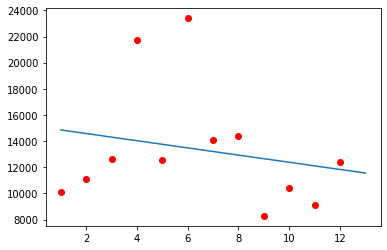

In [116]:
plt.scatter(X.iloc[:-1]  ,  y , color = 'red' , label = 'true value') 
plt.plot(X, X * model.coef_ + model.intercept_ , label = 'predicted linre using regression' )

In [117]:
dic = {}
predicted = X * model.coef_ + model.intercept_
predicted.columns = ['پیشبینی' + ' ' + x]
predicted= predicted.reset_index().drop('index' , axis = 1)
dic['mean square error'] = mean_squared_error(predicted.iloc[:-1] ,y)

dic['mean absolute error'] = mean_absolute_error(predicted.iloc[:-1] , y)
dic['mean error'] = (predicted.iloc[: -1].values - y.values).mean()
    

In [118]:
data1 = pd.concat([X , y , predicted] , axis = 1)
error = pd.DataFrame(dic, columns = dic.keys() , index = [x])

In [119]:
data1.set_index('ماه').sort_index()

,تعداد کل قطعه در ماه,پیشبینی روكش پلاستيكي محفظه جاچراغي صندوق عقب
ماه,,
1.0,10080.0,14855.384615
2.0,11100.0,14580.769231
3.0,12600.0,14306.153846
4.0,21720.0,14031.538462
5.0,12540.0,13756.923077
6.0,23400.0,13482.307692
7.0,14100.0,13207.692308
8.0,14400.0,12933.076923
9.0,8280.0,12658.461538


In [121]:
error.to_excel('error.xlsx' ,sheet_name = 'Sheet1')
data1.to_excel('regression.xlsx', sheet_name= 'Sheet2')

In [61]:
def line_predicted(dashbord):
    
    dic = {}
    
    
    #splitting 
    y = dashbord.loc[: , ['تعداد کل قطعه در ماه']]
    X = dashbord.loc[: , ['ماه']]
    
    X= X.reset_index().drop('index' , axis = 1)
    y = y.reset_index().drop('index' , axis = 1)
    #model
    model = LinearRegression()
    model.fit(X , y )
    
    X.loc[len(x) , 'ماه'] = 13
    predicted = X * model.coef_ + model.intercept_
    predicted.columns = ['پیشبینی' + ' ' + x]
    predicted= predicted.reset_index().drop('index' , axis = 1)
    #plotting
    
    plt.plot(X, X * model.coef_ + model.intercept_ , label = 'predicted linre using regression' )
    plt.scatter(X.iloc[:-1]  ,  y , color = 'red' , label = 'true value') 
    plt.xlabel('month of the year')
    plt.ylabel('demand')
    plt.title('prediction using regression' , fontsize = 15)
    plt.legend()
    
    #error adding to dic 
    dic['mean square error'] = mean_squared_error(predicted.iloc[:-1] ,y)
    dic['mean absolute error'] = mean_absolute_error(predicted.iloc[:-1] , y)
    dic['mean error'] = (predicted.iloc[: -1].values - y.values).mean()
    
    #concat tree type of data
    data = pd.concat([X , y , predicted] , axis = 1)
    error = pd.DataFrame(dic, columns = dic.keys() , index = [x])
    return  error , data
    

ValueError: x and y must be the same size

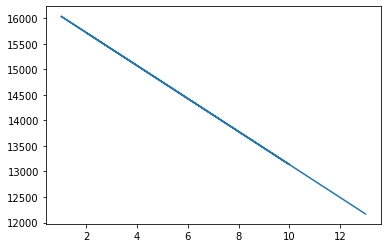

In [62]:
error , data = line_predicted(dashbord)

In [50]:
error.to_excel('error.xlsx' ,sheet_name = 'Sheet1')
data.to_excel('regression.xlsx', sheet_name= 'Sheet2')